In [1]:
library(readxl)
library("tidyverse")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Data Wrangling no R

Atividade de análise nº 2 - Dataset (A1) WHO COVID-19 Global Table. O dataset contém informações sobre a pandemia do COVID-19 em diversos países. Atualmente, as informações estão desatualizadas (mas o foco é data wrangling). O dataset é um arquivo CSV, com informações separadas por vírgulas

In [2]:
base_covid <- read.csv("(2.2) WHO COVID-19 Global Table.csv", 
                       header = TRUE, 
                       sep = ",",
                       dec = ".")

head(base_covid, n = 5)

ï..Name,WHO.Region,Cases...cumulative.total,Cases...cumulative.total.per.100000.population,Cases...newly.reported.in.last.7.days,Cases...newly.reported.in.last.7.days.per.100000.population,Cases...newly.reported.in.last.24.hours,Deaths...cumulative.total,Deaths...cumulative.total.per.100000.population,Deaths...newly.reported.in.last.7.days,Deaths...newly.reported.in.last.7.days.per.100000.population,Deaths...newly.reported.in.last.24.hours,Transmission.Classification
Global,,190597409,2445.268,3427304,43.97057,427576,4093145,52.51297,56567,0.7257259,7145,
United States of America,Americas,33723155,10188.180,208209,62.90000,0,603790,182.41000,1846,0.5600000,0,Community transmission
India,South-East Asia,31144229,2256.820,269853,19.55000,38164,414108,30.01000,5344,0.3900000,499,Clusters of cases
Brazil,Americas,19342448,9099.780,273445,128.64000,34339,541266,254.64000,8373,3.9400000,868,Community transmission
Russian Federation,Europe,5982766,4099.630,174293,119.43000,24633,149138,102.20000,5426,3.7200000,719,Clusters of cases


O primeiro argumento indica o nome do dataset. O argumento "header" indica que a primeia linha contém os nomes das variáveis. O argumento "sep" indica que a separação das colunas é feita por vírgulas. O argumento "dec" indica que a separação dos decimais ocorre por pontos

In [3]:
dim(base_covid)

[1] 238  13

In [4]:
names(base_covid)

[1] "ï..Name"                                                     
 [2] "WHO.Region"                                                  
 [3] "Cases...cumulative.total"                                    
 [4] "Cases...cumulative.total.per.100000.population"              
 [5] "Cases...newly.reported.in.last.7.days"                       
 [6] "Cases...newly.reported.in.last.7.days.per.100000.population" 
 [7] "Cases...newly.reported.in.last.24.hours"                     
 [8] "Deaths...cumulative.total"                                   
 [9] "Deaths...cumulative.total.per.100000.population"             
[10] "Deaths...newly.reported.in.last.7.days"                      
[11] "Deaths...newly.reported.in.last.7.days.per.100000.population"
[12] "Deaths...newly.reported.in.last.24.hours"                    
[13] "Transmission.Classification"

Os nomes estão ruins, vamos alterar e simplificar os nomes das variáveis:

In [5]:
base_covid <- base_covid %>% rename(nome = 1,
                                    regiao = 2,
                                    casos_total = 3,
                                    casos_relativo = 4,
                                    casos_semana = 5,
                                    casos_semana_relativo = 6,
                                    casos_dia = 7,
                                    mortes_total = 8,
                                    mortes_relativo = 9,
                                    mortes_semana = 10,
                                    mortes_semana_relativo = 11,
                                    mortes_dia = 12,
                                    tipo_transmissao = 13)

names(base_covid)

head(base_covid)

[1] "nome"                   "regiao"                 "casos_total"           
 [4] "casos_relativo"         "casos_semana"           "casos_semana_relativo" 
 [7] "casos_dia"              "mortes_total"           "mortes_relativo"       
[10] "mortes_semana"          "mortes_semana_relativo" "mortes_dia"            
[13] "tipo_transmissao"

nome,regiao,casos_total,casos_relativo,casos_semana,casos_semana_relativo,casos_dia,mortes_total,mortes_relativo,mortes_semana,mortes_semana_relativo,mortes_dia,tipo_transmissao
Global,,190597409,2445.268,3427304,43.97057,427576,4093145,52.51297,56567,0.7257259,7145,
United States of America,Americas,33723155,10188.180,208209,62.90000,0,603790,182.41000,1846,0.5600000,0,Community transmission
India,South-East Asia,31144229,2256.820,269853,19.55000,38164,414108,30.01000,5344,0.3900000,499,Clusters of cases
Brazil,Americas,19342448,9099.780,273445,128.64000,34339,541266,254.64000,8373,3.9400000,868,Community transmission
Russian Federation,Europe,5982766,4099.630,174293,119.43000,24633,149138,102.20000,5426,3.7200000,719,Clusters of cases
France,Europe,5749620,8840.220,50723,77.99000,12523,110497,169.89000,121,0.1900000,5,Community transmission


A seguir, vamos alterar as categorias da variável "tipo_transimssao". Podemos utilizar a função mutate e, por exemplo, traduzir para português. Também podemos criar uma categoria para a variável "casos_relativo". Primeiramente: identificar as categorias da variável "tipo_transimssao"

In [6]:
table(base_covid$tipo_transmissao)


                            Clusters of cases Community transmission 
                     1                     39                    151 
              No cases         Not applicable                Pending 
                    23                      1                      3 
        Sporadic cases 
                    20 

In [7]:
unique(base_covid$tipo_transmissao)


[1]                        Community transmission Clusters of cases     
[4] Sporadic cases         Pending                No cases              
[7] Not applicable        
7 Levels:  Clusters of cases Community transmission ... Sporadic cases

Em uma rápida análise dos países, vemos que há "Global" e "Other". Antes de criar categorias para "casos_relativo", vamos excluí-los do dataset

In [8]:
base_covid <- base_covid[-c(1),]            # excluída pelo número de sua linha
head(base_covid)

,nome,regiao,casos_total,casos_relativo,casos_semana,casos_semana_relativo,casos_dia,mortes_total,mortes_relativo,mortes_semana,mortes_semana_relativo,mortes_dia,tipo_transmissao
2,United States of America,Americas,33723155,10188.18,208209,62.90,0,603790,182.41,1846,0.56,0,Community transmission
3,India,South-East Asia,31144229,2256.82,269853,19.55,38164,414108,30.01,5344,0.39,499,Clusters of cases
4,Brazil,Americas,19342448,9099.78,273445,128.64,34339,541266,254.64,8373,3.94,868,Community transmission
5,Russian Federation,Europe,5982766,4099.63,174293,119.43,24633,149138,102.20,5426,3.72,719,Clusters of cases
6,France,Europe,5749620,8840.22,50723,77.99,12523,110497,169.89,121,0.19,5,Community transmission
7,Turkey,Europe,5529719,6556.53,48164,57.11,7680,50554,59.94,325,0.39,66,Community transmission


In [9]:
base_covid <- base_covid[!(base_covid$nome=="Other"),] # excluída por seu nome
head(base_covid)

,nome,regiao,casos_total,casos_relativo,casos_semana,casos_semana_relativo,casos_dia,mortes_total,mortes_relativo,mortes_semana,mortes_semana_relativo,mortes_dia,tipo_transmissao
2,United States of America,Americas,33723155,10188.18,208209,62.90,0,603790,182.41,1846,0.56,0,Community transmission
3,India,South-East Asia,31144229,2256.82,269853,19.55,38164,414108,30.01,5344,0.39,499,Clusters of cases
4,Brazil,Americas,19342448,9099.78,273445,128.64,34339,541266,254.64,8373,3.94,868,Community transmission
5,Russian Federation,Europe,5982766,4099.63,174293,119.43,24633,149138,102.20,5426,3.72,719,Clusters of cases
6,France,Europe,5749620,8840.22,50723,77.99,12523,110497,169.89,121,0.19,5,Community transmission
7,Turkey,Europe,5529719,6556.53,48164,57.11,7680,50554,59.94,325,0.39,66,Community transmission


Podemos trocar os nomes de "tipo_transimssao" com o "mutate" e "recode". Podemos criar a nova categoria para "casos_relativo" com "mutate" e "cut"

In [10]:
base_covid <- base_covid %>% mutate(tipo_transmissao = recode(tipo_transmissao,
                                                              "Clusters of cases" = "Casos Concentrados",
                                                              "Community transmission" = "Transmissão Comunitária",
                                                              "No cases" = "Sem Casos",
                                                              "Not applicable" = "Não Aplicável",
                                                              "Pending" = "Pendente",
                                                              "Sporadic cases" = "Casos Esporádicos")) %>% 
                            mutate(grupos = cut(casos_relativo,
                                                 c(-Inf, quantile(base_covid$casos_relativo,
                                                                  type = 5,
                                                                  probs = c(0.25, 0.50, 0.75),
                                                                  TRUE),Inf),
                                                 c("primeiro quartil",
                                                   "segundo quartil",
                                                   "terceiro quartil",
                                                   "quarto quartil")))

head(base_covid)

nome,regiao,casos_total,casos_relativo,casos_semana,casos_semana_relativo,casos_dia,mortes_total,mortes_relativo,mortes_semana,mortes_semana_relativo,mortes_dia,tipo_transmissao,grupos
United States of America,Americas,33723155,10188.18,208209,62.90,0,603790,182.41,1846,0.56,0,Transmissão Comunitária,quarto quartil
India,South-East Asia,31144229,2256.82,269853,19.55,38164,414108,30.01,5344,0.39,499,Casos Concentrados,terceiro quartil
Brazil,Americas,19342448,9099.78,273445,128.64,34339,541266,254.64,8373,3.94,868,Transmissão Comunitária,quarto quartil
Russian Federation,Europe,5982766,4099.63,174293,119.43,24633,149138,102.20,5426,3.72,719,Casos Concentrados,terceiro quartil
France,Europe,5749620,8840.22,50723,77.99,12523,110497,169.89,121,0.19,5,Transmissão Comunitária,quarto quartil
Turkey,Europe,5529719,6556.53,48164,57.11,7680,50554,59.94,325,0.39,66,Transmissão Comunitária,quarto quartil


Neste caso, a função cut foi aprimorada em relação ao exemplo da aula. Aqui, geramos as categorias com base nos quartis da variável original

In [11]:
table(base_covid$grupos)


primeiro quartil  segundo quartil terceiro quartil   quarto quartil 
              59               59               59               59 

Vamos excluir a variável "mortes_dia", pois não vamos utilizar. Ao mesmo tempo, vamos trazer a variável "grupos" para o começo do dataset

In [12]:
base_covid <- base_covid %>% select(nome, 
                                    regiao,
                                    grupos,
                                    everything(),
                                    -mortes_dia)


Em seguida, vamos agrupar o dataset com base na variável "grupos". Vamos criar um dataset com informações de resumo (média, desvio padrão, ...). No final, realizar o ungroup para manter o dataset na estrutura original.

In [13]:
base_quartis <- base_covid %>% group_by(grupos) %>% 
  summarise(média=mean(casos_relativo, na.rm = T),
            desvio_padrão=sd(casos_relativo, na.rm = T),
            obs.=n()) %>%
  ungroup () %>% droplevels(.)

base_quartis

grupos,média,desvio_padrão,obs.
primeiro quartil,78.26051,75.08828,59
segundo quartil,879.38356,559.01495,59
terceiro quartil,4191.04949,1299.10049,59
quarto quartil,9655.46983,2872.95452,59


Como já fizemos o ungroup acima, poderíamos realizar uma análise diferente:

In [14]:
base_regiao <- base_covid %>% group_by(regiao) %>% 
  summarise(média=mean(casos_relativo, na.rm = T),
            desvio_padrão=sd(casos_relativo, na.rm = T),
            obs.=n()) %>%
  ungroup () %>% droplevels(.)

base_regiao

regiao,média,desvio_padrão,obs.
Africa,1205.6226,2865.864,50
Americas,4278.6661,3371.564,56
Eastern Mediterranean,4024.0605,4060.737,22
Europe,6959.3889,4074.796,62
South-East Asia,2161.1909,4007.866,11
Western Pacific,850.7049,1686.907,35


Vamos adicionar duas novas variáveis ao dataset utilizando a função "join". As variáveis estão na planilha em Excel WBD Pib per Capita. Vamos trazer "income group" e "PIB em 2019" utilizando "right join"

# Library readxl

In [15]:
library(readxl)

PIB2019 <- read_excel("(2.3) WBD PIB per Capita.xls")

head(PIB2019)

Country Name,Country Code,Income group,2019
Aruba,ABW,High income,NA
Africa Eastern and Southern,AFE,NA,1481.4253
Afghanistan,AFG,Low income,507.1034
Africa Western and Central,AFW,NA,1772.3392
Angola,AGO,Lower middle income,2809.6261
Albania,ALB,Upper middle income,5355.8478


A chave para o merge é o nome do país, mas é necessária a alteração no nome. Vamos aproveitar o mesmo código e fazer algumas alterações adicionais

In [16]:
base_covid_2 <- PIB2019 %>% rename(nome="Country Name") %>%
  right_join(base_covid, by = "nome") %>% 
  select(everything(), -`Country Code`) %>% 
  rename(grupo_renda="Income group") %>% 
  mutate(grupo_renda = recode(grupo_renda,
                              "High income" = "PIB Muito Elevado",
                              "Upper middle income" = "PIB Elevado",
                              "Lower middle income" = "PIB Baixo",
                              "Low income" = "PIB Muito Baixo"))

head(base_covid_2)

Warning message:
"Column `nome` joining character vector and factor, coercing into character vector"

nome,grupo_renda,2019,regiao,grupos,casos_total,casos_relativo,casos_semana,casos_semana_relativo,casos_dia,mortes_total,mortes_relativo,mortes_semana,mortes_semana_relativo,tipo_transmissao
United States of America,PIB Muito Elevado,65279.529,Americas,quarto quartil,33723155,10188.18,208209,62.90,0,603790,182.41,1846,0.56,Transmissão Comunitária
India,PIB Baixo,2100.751,South-East Asia,terceiro quartil,31144229,2256.82,269853,19.55,38164,414108,30.01,5344,0.39,Casos Concentrados
Brazil,PIB Elevado,8897.488,Americas,quarto quartil,19342448,9099.78,273445,128.64,34339,541266,254.64,8373,3.94,Transmissão Comunitária
Russian Federation,PIB Elevado,11497.649,Europe,terceiro quartil,5982766,4099.63,174293,119.43,24633,149138,102.20,5426,3.72,Casos Concentrados
France,PIB Muito Elevado,40380.099,Europe,quarto quartil,5749620,8840.22,50723,77.99,12523,110497,169.89,121,0.19,Transmissão Comunitária
Turkey,PIB Elevado,9126.594,Europe,quarto quartil,5529719,6556.53,48164,57.11,7680,50554,59.94,325,0.39,Transmissão Comunitária


Como é um "right join", levamos as variáveis do PIB2019 para a base_covid. Portanto, a base_covid_2 contém as mesmas observações da base_covid. Note que surgem os NAs nos casos não identificados. Vamos analisar com base na nova variável adicionada pelo merge.

In [17]:
base_renda <- base_covid_2 %>% group_by(grupo_renda) %>% 
  summarise(média=mean(casos_relativo, na.rm = T),
            desvio_padrão=sd(casos_relativo, na.rm = T),
            obs.=n()) %>%
  ungroup () %>% droplevels(.)

head(base_renda)

grupo_renda,média,desvio_padrão,obs.
NA,3512.7733,3944.9370,30
PIB Baixo,1166.1518,1530.8814,51
PIB Elevado,4489.9844,3736.1560,54
PIB Muito Baixo,150.1352,110.9835,27
PIB Muito Elevado,6244.2688,4464.6033,74


Ou mesmo um gráfico para ilustrar por imagem:

nome,grupo_renda,2019,regiao,grupos,casos_total,casos_relativo,casos_semana,casos_semana_relativo,casos_dia,mortes_total,mortes_relativo,mortes_semana,mortes_semana_relativo,tipo_transmissao
United States of America,PIB Muito Elevado,65279.529,Americas,quarto quartil,33723155,10188.18,208209,62.90,0,603790,182.41,1846,0.56,Transmissão Comunitária
India,PIB Baixo,2100.751,South-East Asia,terceiro quartil,31144229,2256.82,269853,19.55,38164,414108,30.01,5344,0.39,Casos Concentrados
Brazil,PIB Elevado,8897.488,Americas,quarto quartil,19342448,9099.78,273445,128.64,34339,541266,254.64,8373,3.94,Transmissão Comunitária
Russian Federation,PIB Elevado,11497.649,Europe,terceiro quartil,5982766,4099.63,174293,119.43,24633,149138,102.20,5426,3.72,Casos Concentrados
France,PIB Muito Elevado,40380.099,Europe,quarto quartil,5749620,8840.22,50723,77.99,12523,110497,169.89,121,0.19,Transmissão Comunitária
Turkey,PIB Elevado,9126.594,Europe,quarto quartil,5529719,6556.53,48164,57.11,7680,50554,59.94,325,0.39,Transmissão Comunitária


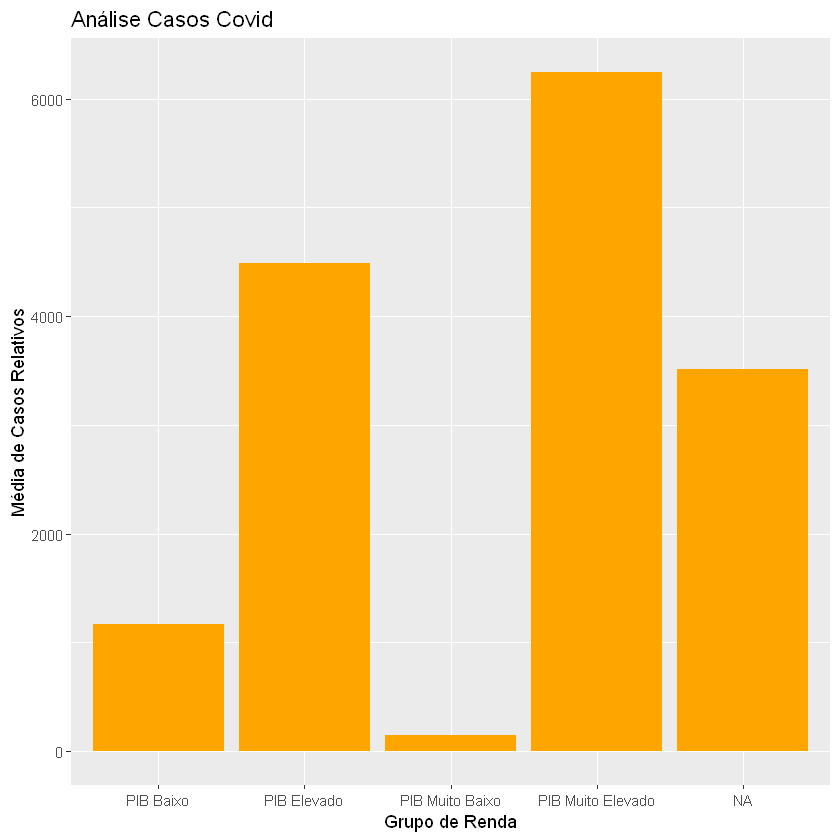

In [18]:
base_covid_2 %>% group_by(grupo_renda) %>% 
  summarise(média=mean(casos_relativo, na.rm = T),
            desvio_padrão=sd(casos_relativo, na.rm = T),
            obs.=n()) %>% ungroup () %>% droplevels(.) %>% 
  ggplot() + 
  geom_col(aes(x=grupo_renda, y=média), fill="orange") + 
  labs(x = "Grupo de Renda",
       y = "Média de Casos Relativos",
       title = "Análise Casos Covid")

head(base_covid_2)